# Drawing Economic Conclusions from applying feature selection on the Indian Stock Market

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
#reading data from csv file
df=pd.read_csv("Nifty50_Index_data.csv")
df

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
0,2006-01-02,2836.80,2849.45,2825.40,2835.95,51922369,17.16,4.37,1.56
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52
...,...,...,...,...,...,...,...,...,...
3504,2020-02-24,12012.55,12012.55,11813.40,11829.40,491224913,26.92,3.33,1.29
3505,2020-02-25,11877.50,11883.05,11779.90,11797.90,461349973,26.85,3.32,1.29
3506,2020-02-26,11738.55,11783.25,11639.60,11678.50,567990976,26.58,3.29,1.30
3507,2020-02-27,11661.25,11663.85,11536.70,11633.30,609266324,26.48,3.27,1.31


In [3]:
#display first 5 elements
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
0,2006-01-02,2836.80,2849.45,2825.40,2835.95,51922369,17.16,4.37,1.56
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52


In [4]:
#size of the csv file
df.shape

(3509, 9)

In [5]:
df.describe()

,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
count,3509.000000,3509.000000,3509.000000,3509.000000,3.509000e+03,3509.000000,3509.000000,3509.000000
mean,6772.649801,6814.715560,6721.190838,6768.712653,1.994744e+08,21.463169,3.653833,1.295828
std,2592.286250,2590.252414,2586.861049,2587.438559,1.285080e+08,3.642930,0.779807,0.222682
min,2526.200000,2585.300000,2252.750000,2524.200000,2.768292e+06,10.680000,2.120000,0.820000
25%,4915.100000,4965.800000,4861.200000,4921.400000,1.261614e+08,18.640000,3.160000,1.140000
50%,5920.900000,5953.700000,5877.100000,5911.500000,1.668189e+08,21.140000,3.490000,1.270000
75%,8599.400000,8627.900000,8545.850000,8588.650000,2.305615e+08,23.730000,3.750000,1.440000
max,12430.500000,12430.500000,12321.400000,12362.300000,1.414837e+09,29.900000,6.550000,2.240000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3509 non-null   object 
 1   Open            3509 non-null   float64
 2   High            3509 non-null   float64
 3   Low             3509 non-null   float64
 4   Close           3509 non-null   float64
 5   Volume          3509 non-null   int64  
 6   pe_ratio        3509 non-null   float64
 7   pb_ratio        3509 non-null   float64
 8   dividend_yield  3509 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 246.9+ KB


In [7]:
#the column names
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'pe_ratio',
       'pb_ratio', 'dividend_yield'],
      dtype='object')

In [8]:
df.nunique()

Date              3509
Open              3467
High              3471
Low               3466
Close             3460
Volume            3508
pe_ratio          1262
pb_ratio           382
dividend_yield     131
dtype: int64

In [9]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
pe_ratio          0
pb_ratio          0
dividend_yield    0
dtype: int64

In [10]:
df.corr()

,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
Open,1.000000,0.999853,0.999769,0.999639,0.535758,0.815350,-0.205317,-0.264850
High,0.999853,1.000000,0.999747,0.999838,0.538645,0.816323,-0.203770,-0.265689
Low,0.999769,0.999747,1.000000,0.999835,0.532251,0.815696,-0.205797,-0.265620
Close,0.999639,0.999838,0.999835,1.000000,0.535580,0.816524,-0.204274,-0.266137
Volume,0.535758,0.538645,0.532251,0.535580,1.000000,0.406848,-0.263551,0.028869
pe_ratio,0.815350,0.816323,0.815696,0.816524,0.406848,1.000000,0.263742,-0.675280
pb_ratio,-0.205317,-0.203770,-0.205797,-0.204274,-0.263551,0.263742,1.000000,-0.575115
dividend_yield,-0.264850,-0.265689,-0.265620,-0.266137,0.028869,-0.675280,-0.575115,1.000000


In [11]:
df.cov()

,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
Open,6.719948e+06,6.713690e+06,6.704335e+06,6.704960e+06,1.784770e+11,7.699769e+03,-4.150449e+02,-152.885847
High,6.713690e+06,6.709408e+06,6.698930e+06,6.701033e+06,1.792978e+11,7.702912e+03,-4.115934e+02,-153.249709
Low,6.704335e+06,6.698930e+06,6.691850e+06,6.692238e+06,1.769376e+11,7.686917e+03,-4.151438e+02,-153.009249
Close,6.704960e+06,6.701033e+06,6.692238e+06,6.694838e+06,1.780840e+11,7.696438e+03,-4.121643e+02,-153.341738
Volume,1.784770e+11,1.792978e+11,1.769376e+11,1.780840e+11,1.651431e+16,1.904639e+08,-2.641086e+07,826126.656827
pe_ratio,7.699769e+03,7.702912e+03,7.686917e+03,7.696438e+03,1.904639e+08,1.327094e+01,7.492332e-01,-0.547796
pb_ratio,-4.150449e+02,-4.115934e+02,-4.151438e+02,-4.121643e+02,-2.641086e+07,7.492332e-01,6.080984e-01,-0.099868
dividend_yield,-1.528858e+02,-1.532497e+02,-1.530092e+02,-1.533417e+02,8.261267e+05,-5.477962e-01,-9.986790e-02,0.049587


# Calculating multi day SMA/EMA signal values for the data

In [12]:

# simple moving average : 10 day,20 day,50 day periods
df["sma10"] = df.Close.rolling(window=10,min_periods = 1).mean().round(2)
df["sma20"] = df.Close.rolling(window=20,min_periods = 1).mean().round(2)
df["sma50"] = df.Close.rolling(window=50,min_periods = 1).mean().round(2)
# exp moving average calc : 10 day,20 day,50 day
df['ema10'] = df.Close.ewm(span=10,adjust=False,min_periods=1).mean().round(2)
df['ema20'] = df.Close.ewm(span=20,adjust=False,min_periods=1).mean().round(2)
df['ema50'] = df.Close.ewm(span=50,adjust=False,min_periods=1).mean().round(2)


In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield,sma10,sma20,sma50,ema10,ema20,ema50
0,2006-01-02,2836.80,2849.45,2825.40,2835.95,51922369,17.16,4.37,1.56,2835.95,2835.95,2835.95,2835.95,2835.95,2835.95
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54,2859.65,2859.65,2859.65,2844.57,2840.46,2837.81
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53,2874.57,2874.57,2874.57,2855.45,2846.55,2840.42
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53,2880.89,2880.89,2880.89,2863.52,2851.63,2842.75
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52,2887.51,2887.51,2887.51,2872.70,2857.57,2845.54


# Calculate the 10,20,50 day simple moving average buy sell signals

In [14]:

### as our Technical Indicator this will be a binary variables
df['sma10sig'],df['sma20sig'],df['sma50sig'] = df.sma10,df.sma20,df.sma50
## here we will populate buy sell binary values for sma calls, if sma> close then buy ,else sell
for i in range(len(df.Close)):
    if df.sma10[i] < df.Close[i]:
        df.sma10sig.loc[i] = 1
    else:
        df.sma10sig.loc[i] = 0
    if df.sma20[i] < df.Close[i]:
        df.sma20sig.loc[i] = 1
    else:
        df.sma20sig.loc[i] = 0
    if df.sma50[i] < df.Close[i]:
        df.sma50sig.loc[i] = 1
    else:
        df.sma50sig.loc[i] = 0

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Calculate the 10,20,50 day exponential moving average buy sell signals

In [15]:
##as our Technical Indicator
## create dummy data variable
df['ema10sig'],df['ema20sig'],df['ema50sig'] = df.ema10,df.ema20,df.ema50
## here we will populate buy sell sig for ema calls, if ema > close then buy else sell
for i in range(len(df.Close)):
    if df.ema10[i] < df.Close[i]:
        df.ema10sig.loc[i] = 1
    else:
        df.ema10sig.loc[i] = 0
    if df.ema20[i] < df.Close[i]:
        df.ema20sig.loc[i] = 1
    else:
        df.ema20sig.loc[i] = 0
    if df.ema50[i] < df.Close[i]:
        df.ema50sig.loc[i] = 1
    else:
        df.ema50sig.loc[i] = 0


# Calculate voltality,momentum,OI_change,OI_volatility and OI_momentum

In [16]:
## volatility defined as percentage change from last day closing price
df['Volatility'] = round(df.Close.pct_change(periods=1,fill_method='pad') * 100, 2)
## Momentum, which is 0 or 1 based on if last closing < current close or vice versa
df['Momentum'] = df.Volatility.apply(lambda x : 0 if (x<0) else 1)
## OI_change represents change in Volume
df['OI_change'] = df.Volume.diff(periods =1)
## OI_Volatility = percent change in OI/Volume
df['OI_Volatility'] = round(df.Volume.pct_change(periods=1,fill_method='pad') *100,2)
## OI_Momentum which is 0 or 1 based on if last Volume < current Volume or vice versa
df['OI_Momentum'] = df.OI_Volatility.apply(lambda x : 0 if (x<0) else 1)


In [17]:
## Removing NA values
df.dropna(axis=0,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 1 to 3508
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3508 non-null   object 
 1   Open            3508 non-null   float64
 2   High            3508 non-null   float64
 3   Low             3508 non-null   float64
 4   Close           3508 non-null   float64
 5   Volume          3508 non-null   int64  
 6   pe_ratio        3508 non-null   float64
 7   pb_ratio        3508 non-null   float64
 8   dividend_yield  3508 non-null   float64
 9   sma10           3508 non-null   float64
 10  sma20           3508 non-null   float64
 11  sma50           3508 non-null   float64
 12  ema10           3508 non-null   float64
 13  ema20           3508 non-null   float64
 14  ema50           3508 non-null   float64
 15  sma10sig        3508 non-null   float64
 16  sma20sig        3508 non-null   float64
 17  sma50sig        3508 non-null   f

# Drop the sma,ema corr features

In [18]:
## drop the sma,ema corr features set to reduce dimensinality since we already generated signal values from them :
df.drop(['sma10','sma20','sma50','ema10','ema20','ema50'],axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 1 to 3508
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3508 non-null   object 
 1   Open            3508 non-null   float64
 2   High            3508 non-null   float64
 3   Low             3508 non-null   float64
 4   Close           3508 non-null   float64
 5   Volume          3508 non-null   int64  
 6   pe_ratio        3508 non-null   float64
 7   pb_ratio        3508 non-null   float64
 8   dividend_yield  3508 non-null   float64
 9   sma10sig        3508 non-null   float64
 10  sma20sig        3508 non-null   float64
 11  sma50sig        3508 non-null   float64
 12  ema10sig        3508 non-null   float64
 13  ema20sig        3508 non-null   float64
 14  ema50sig        3508 non-null   float64
 15  Volatility      3508 non-null   float64
 16  Momentum        3508 non-null   int64  
 17  OI_change       3508 non-null   f

In [19]:
## convert date column to Index
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield,sma10sig,sma20sig,sma50sig,ema10sig,ema20sig,ema50sig,Volatility,Momentum,OI_change,OI_Volatility,OI_Momentum
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54,1.0,1.0,1.0,1.0,1.0,1.0,1.67,1,4996774.0,9.62,1
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53,1.0,1.0,1.0,1.0,1.0,1.0,0.73,1,25102136.0,44.10,1
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53,1.0,1.0,1.0,1.0,1.0,1.0,-0.16,0,-11939027.0,-14.56,0
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52,1.0,1.0,1.0,1.0,1.0,1.0,0.49,1,13272193.0,18.94,1
5,2006-01-09,2913.35,2927.25,2898.25,2910.10,74818404,17.62,4.49,1.52,1.0,1.0,1.0,1.0,1.0,1.0,-0.13,0,-8536041.0,-10.24,0


# Split the training and test set

In [21]:

training_set = df.loc[0:3000,:]
test_set = df.loc[3000:,:]
print('Training Set Shape:' + str(training_set.shape) ,'Test Set Shape:' +str(test_set.shape))

Training Set Shape:(3000, 20) Test Set Shape:(509, 20)


In [22]:
## we remove date column from in dataset and convert the numerical data to numpy array for processing
training_set.set_index('Date',inplace=True)
test_set.set_index('Date',inplace=True)
## convert dataframe to np arrary for reshaping
train_data = training_set.to_numpy()
test_data = test_set.to_numpy()
print('Training Set Shape:' + str(train_data.shape) ,'Test Set Shape:' +str(test_data.shape))


Training Set Shape:(3000, 19) Test Set Shape:(509, 19)


# Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler ## import scalar
scaler=MinMaxScaler(feature_range=(0,1))
## transforming dataframe for both training_set and test_set it will return final ndarray for reshape and input
scaler1=MinMaxScaler(feature_range=(0,1))
scaler2=MinMaxScaler(feature_range=(0,1))
X_train = scaler1.fit_transform(train_data)
X_test = scaler2.fit_transform(test_data)
print('Training Set Shape:' + str(X_train.shape) ,'Test Set Shape:' +str(X_test.shape))
## Here we will extract y_train, as will be the close price, as we are predicting Close price which is column 3 in array
y_train = X_train[:,3]
y_test = X_test[:,3]
print('y_train Set Shape:' + str(y_train.shape) ,'y_Test Set Shape:' +str(y_test.shape))


Training Set Shape:(3000, 19) Test Set Shape:(509, 19)
y_train Set Shape:(3000,) y_Test Set Shape:(509,)


In [24]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib


In [25]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# SFS Algorithm

In [26]:
#Importing all required libraries and initializing Random Forest Regressor object
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs= 4,oob_score= True)


In [27]:
#Creating SFS Model and printing selected features
sfs1 = SFS(rf_model,
            k_features=7,
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=5)
sfs1 = sfs1.fit(X_train[:,5:], y_train)




In [28]:
FeatureNames = ["Volume",
    "pe_ratio" ,
    "pb_ratio" ,
    "dividend_yield" ,
    "sma10sig" ,
    "sma20sig" ,
    "sma50sig" ,
    "ema10sig" ,
    "ema20sig" ,
    "ema50sig" ,
    "Volatility" ,
    "Momentum" ,
    "OI_change" ,
    "OI_Volatility" ,
    "OI_Momentum"
]
print('Selected features by SFS:')
SFSSelected_features=[]
for i in sfs1.k_feature_idx_:
    print(FeatureNames[i], "-", i)
    SFSSelected_features+=[[FeatureNames[i],i]]
    
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

Selected features by SFS:
Volume - 0
pe_ratio - 1
pb_ratio - 2
sma20sig - 5
ema10sig - 7
ema50sig - 9
Volatility - 10


In [29]:
 pip install boruta

Note: you may need to restart the kernel to use updated packages.


# Boruta Algorithm

In [30]:
 from boruta import BorutaPy as bp


In [31]:
#Creating Boruta Model and printing selected features
rf_model = RandomForestRegressor(n_jobs= 4,oob_score= True)
feat_selector = bp(rf_model,n_estimators = 'auto', verbose= 0,max_iter= 100)
feat_selector.fit(X_train[:,5:], y_train)
BorutaSelected_features = [[FeatureNames[i],i] for i, x in enumerate(feat_selector.support_) if x]
print('Selected features by Boruta:')
for i in BorutaSelected_features:
    print(i[0],'-',i[1])

Selected features by Boruta:
Volume - 0
pe_ratio - 1
pb_ratio - 2
sma20sig - 5
ema20sig - 8
ema50sig - 9
Momentum - 11


In [32]:
 !pip install skfeature-chappers

# Fisher's Score algorithm

In [33]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt


In [34]:
 X_train[:,5:].shape

(3000, 14)

In [35]:
%matplotlib inline
ranks=fisher_score.fisher_score(X_train[:,5:], y_train)
feat_importances=pd.Series(ranks,range(14))


In [36]:
FisherSelected_features=[]
#print(feat_importances) - to print ranks
for i in range(len(feat_importances)):
    if feat_importances[i] > 8:
        print(FeatureNames[i], "-", i)
        FisherSelected_features+=[[FeatureNames[i],i]]

pe_ratio - 1
dividend_yield - 3
ema20sig - 8
Momentum - 11
OI_change - 12


In [37]:
model = RandomForestRegressor(n_jobs= 4,oob_score= True)
model.fit(X_train[:,5:],y_train)


RandomForestRegressor(n_jobs=4, oob_score=True)

# RFImportanceSelected Algorithm

In [38]:
RFImportanceSelected_features = []
importances =model.feature_importances_
final_df=pd.DataFrame({"Features":list(range(14)),"Importances":importances})
final_df=final_df.sort_values("Importances",ascending=False)
df = final_df.head()
for i in df.Features:
    print(FeatureNames[i], "-", i)
    RFImportanceSelected_features+=[[FeatureNames[i],i]]

Volume - 0
pe_ratio - 1
pb_ratio - 2
ema50sig - 9
ema20sig - 8


# COMMON SELECTED Algorithm

In [39]:
CommonSelectedFeatures = [i for i in BorutaSelected_features for j in SFSSelected_features if i==j]
print('Common features that are selected by both SFS and Boruta Feature Selection are:')
for i in CommonSelectedFeatures:
    print(i[0],'-',i[1])


Common features that are selected by both SFS and Boruta Feature Selection are:
Volume - 0
pe_ratio - 1
pb_ratio - 2
sma20sig - 5
ema50sig - 9


In [40]:
#Contains all features
X_trainALL = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_testALL = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print('X_trainALL Set Shape:' + str(X_trainALL.shape) ,'X_TestALL Set Shape:' +str(X_testALL.shape))


X_trainALL Set Shape:(3000, 1, 19) X_TestALL Set Shape:(509, 1, 19)


# Features Selected by SFS Algorithm

In [41]:
#Contains features Selected by SFS Algorithm
X_trainSFS = []
X_testSFS = []
for i in SFSSelected_features:
    X_trainSFS+=[X_train[:,i[1]]]
    X_testSFS+=[X_test[:,i[1]]]
X_trainSFS = np.array(X_trainSFS).T
X_testSFS = np.array(X_testSFS).T
X_trainSFS = np.reshape(X_trainSFS,(X_trainSFS.shape[0],1,X_trainSFS.shape[1]))
X_testSFS = np.reshape(X_testSFS,(X_testSFS.shape[0],1,X_testSFS.shape[1]))
print('X_trainSFS Set Shape:' + str(X_trainSFS.shape) ,'X_TestSFS Set Shape:' +str(X_testSFS.shape))


X_trainSFS Set Shape:(3000, 1, 7) X_TestSFS Set Shape:(509, 1, 7)


# Features Selected by Boruta Algorithm

In [42]:
#Contains features Selected by Boruta Algorithm
X_trainBOR = []
X_testBOR = []
for i in BorutaSelected_features:
    X_trainBOR+=[X_train[:,i[1]]]
    X_testBOR+=[X_test[:,i[1]]]
X_trainBOR = np.array(X_trainBOR).T
X_testBOR = np.array(X_testBOR).T
X_trainBOR = np.reshape(X_trainBOR,(X_trainBOR.shape[0],1,X_trainBOR.shape[1]))
X_testBOR = np.reshape(X_testBOR,(X_testBOR.shape[0],1,X_testBOR.shape[1]))
print('X_trainBOR Set Shape:' + str(X_trainBOR.shape) ,'X_testBOR Set Shape:' +str(X_testBOR.shape))


X_trainBOR Set Shape:(3000, 1, 7) X_testBOR Set Shape:(509, 1, 7)


# Features Selected by Fisher's Score Algorithm

In [43]:
#Contains features Selected by Fisher's Score Algorithm
X_trainF = []
X_testF = []
for i in FisherSelected_features:
    X_trainF+=[X_train[:,i[1]]]
    X_testF+=[X_test[:,i[1]]]
X_trainF = np.array(X_trainF).T
X_testF = np.array(X_testF).T
X_trainF = np.reshape(X_trainF,(X_trainF.shape[0],1,X_trainF.shape[1]))
X_testF = np.reshape(X_testF,(X_testF.shape[0],1,X_testF.shape[1]))
print('X_trainF Set Shape:' + str(X_trainF.shape) ,'X_testF Set Shape:' +str(X_testF.shape))


X_trainF Set Shape:(3000, 1, 5) X_testF Set Shape:(509, 1, 5)


# Features Selected by RFImportanceSelected Algorithm

In [44]:
#Contains features Selected by RFImportanceSelected Algorithm
X_trainRFI = []
X_testRFI = []
for i in RFImportanceSelected_features:
    X_trainRFI+=[X_train[:,i[1]]]
    X_testRFI+=[X_test[:,i[1]]]
X_trainRFI = np.array(X_trainRFI).T
X_testRFI = np.array(X_testRFI).T
X_trainRFI = np.reshape(X_trainRFI,(X_trainRFI.shape[0],1,X_trainRFI.shape[1]))
X_testRFI = np.reshape(X_testRFI,(X_testRFI.shape[0],1,X_testRFI.shape[1]))
print('X_trainRFI Set Shape:' + str(X_trainRFI.shape) ,'X_testRFI Set Shape:' +str(X_testRFI.shape))


X_trainRFI Set Shape:(3000, 1, 5) X_testRFI Set Shape:(509, 1, 5)


# Features Selected by COMMON SELECTED Algorithm

In [45]:

#Contains features Selected by COMMON SELECTED Algorithm
X_trainCOM = []
X_testCOM = []
for i in CommonSelectedFeatures:
    X_trainCOM+=[X_train[:,i[1]]]
    X_testCOM+=[X_test[:,i[1]]]
X_trainCOM = np.array(X_trainCOM).T
X_testCOM = np.array(X_testCOM).T
X_trainCOM = np.reshape(X_trainCOM,(X_trainCOM.shape[0],1,X_trainCOM.shape[1]))
X_testCOM = np.reshape(X_testCOM,(X_testCOM.shape[0],1,X_testCOM.shape[1]))
print('X_trainCOM Set Shape:' + str(X_trainCOM.shape) ,'X_testCOM Set Shape:' +str(X_testCOM.shape))

X_trainCOM Set Shape:(3000, 1, 5) X_testCOM Set Shape:(509, 1, 5)


In [46]:
!pip install tensorflow

In [47]:
from sklearn.metrics import r2_score
# import the relevant Keras modules
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras


# LSTM MODEL base network model

In [48]:
## define LSTM MODEL base network model here
## initialise model architecture :: training of LSTM model begins
## the model will run for n runs, each run with e epochs the putput params wil be averaged out
from sklearn.metrics import mean_absolute_error , r2_score
Dscore = {}
def PredictionAlgo(X_train,X_test,type1):
    ## to be used for reverse scaling for predicted close price from the model vs the original data
    scale = MinMaxScaler()
    ## here we copy class values used for scaling test set and use same values for scaling close price
    ## scaler2 instance was contains scaled parameters of test set ,this is used since scaler2 instance has paremetrs of all 16 Features,
    ## we will extract only the parameter for close price scaling, this can be done for any parameters in list
    scale.min_,scale.scale_ = scaler2.min_[0],scaler2.scale_[0]
    epoch = 200 ## number of epochs
    validation_set = 0.2
    batch_size = 10 ## batch size per epoch run
    training_loss = np.zeros(epoch)
    training_mae_loss = np.zeros(epoch)
    validation_Loss = np.zeros(epoch)
    validation_mae_loss =np.zeros(epoch)
    training_rmse_loss = np.zeros(epoch)
    training_msle_loss = np.zeros(epoch)
    predicted_average_price = np.zeros(len(y_test))
    ## -- define model layer parameters
    ## processing loop starts
    model = Sequential()
    neurons = 128
    dense_l1 = 64
    output_size = 1
    activ_func ='relu'
    activ_out_func ='linear'
    loss = keras.losses.MeanSquaredError(reduction="auto",name="mean_squared_error")
    dropout = 0.2
    opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
    ## -- create the model layer parameters
    model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,recurrent_activation=activ_func,dropout=dropout,input_shape=(X_train.shape[1],X_train.shape[2]))) # size is 2000 x 1 x 5
    model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout))
    model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout))
    model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout))
    model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout))
    model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout))
    model.add(LSTM(units=neurons,activation=activ_func,dropout=dropout))
    model.add(Dense(units=dense_l1,activation=activ_func))
    model.add(Dense(units=output_size,activation=activ_out_func))
    model.compile(loss=loss, optimizer=opt_adam,metrics=[keras.metrics.RootMeanSquaredError()])
    ## -- run the model here for n runs, e epochs , set verbose = 0 to disable output
    model_history = model.fit(X_train,y_train,epochs=epoch,validation_split=validation_set , batch_size=batch_size, verbose=0, shuffle=False)
    ## predictions and R2 score calculation on model data
    ##------------------------------------------------------------------------------------
    closing_price=model.predict(X_test)
    closing_price_scaled=scale.inverse_transform(closing_price)
    X2 = pd.DataFrame.copy(test_set)
    X2['Predictions']=closing_price_scaled
    #-----------------------------------------------------------------------------------
    ## here we will create a copy and for each run will add the output values final output
    training_loss = training_loss + model_history.history['loss']
    validation_Loss = validation_Loss + model_history.history['val_loss']
    training_rmse_loss= training_rmse_loss + model_history.history['root_mean_squared_error']
    predicted_average_price = predicted_average_price + closing_price_scaled.reshape(len(y_test)) ## reshape the output array to scalar
    # ------------------------------------------------------------------------
    ## processing loop stops
    print("LSTM Model execution finished")
    ## create final dataset with all values as above and write to file
    New_Labels=['training_loss','validation_Loss','training_rmse_loss']
    df_out = pd.DataFrame([training_loss,validation_Loss,training_rmse_loss],index=None)
    df_out = df_out.transpose()
    df_out.columns = New_Labels
    print()
    print(df_out.head())
    print()
    ## here we prepare the test predicted/original close prices for output
    df_pred = pd.DataFrame()
    New_Labels=['Date','Original_Close','Predicted_close']
    df_pred = pd.DataFrame.copy(test_set)
    df_pred['Predicted_Close_price'] = predicted_average_price.round(2)
    df_pred = df_pred.filter(items=['Close', 'Predicted_Close_price'])
    print(df_pred.head())
    ## here we set jupyter parameters for plotting data
    plt.rc('font', size=10) # controls default text sizes
    plt.rc('axes', titlesize=14) # fontsize of the axes title
    plt.rc('axes', labelsize=12) # fontsize of the x and y labels
    plt.rc('xtick', labelsize=10) # fontsize of the tick labels
    plt.rc('ytick', labelsize=10) # fontsize of the tick labels
    plt.rc('legend', fontsize=12) # legend fontsize
    plt.rc('figure', titlesize=14) # fontsize of the figure title
    # Plot the LSTM Real Close Price and the Predicted Prices against Date
    plt.figure(figsize=(16,8))
    plt.plot(df_pred.index,df_pred.Close, label='RealClose',color='royalblue',linewidth=2)
    plt.plot(df_pred.index,df_pred.Predicted_Close_price, label='PredictedClose',color='crimson',linewidth=2)
    plt.ylabel("Closing Price in INR")
    plt.xlabel("Date Year-Month")
    plt.title("Model Output:Real vs Predicted Prices")
    plt.legend()
    plt.show()
    ## for plotting set the variables
    df_out['epochs'] = np.arange(epoch)
    plt.figure(figsize=(16,8))
    plt.plot(df_out.epochs,df_out.training_loss, label='Training Loss:MSE',color='royalblue',linewidth=2)
    plt.ylabel("Loss Value")
    plt.xlabel("Number of Epochs")
    plt.title("Model Output: Training Loss ")
    plt.legend()
    plt.show()
    plt.figure(figsize=(16,8))
    plt.plot(df_out.epochs,df_out.training_rmse_loss, label='Metric:RMSE',color='royalblue',linewidth=2)
    plt.ylabel("Loss Value")
    plt.xlabel("Number of Epochs")
    plt.title("Model Output:Metric Root Mean Square Error")
    plt.legend()
    plt.show()
    from sklearn.metrics import r2_score
    pred= r2_score(df_pred.Close,df_pred.Predicted_Close_price)*100
    print("R2 Score for Model : " , pred.round(4))
    Dscore[type1] = pred.round(4)





# Running Prediction Algo using all features

16/16 [==============================] - 1s 4ms/step
LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.037110         0.028580            0.192640
1       0.038454         0.071240            0.196097
2       0.033820         0.080028            0.183902
3       0.032616         0.079438            0.180600
4       0.031899         0.064903            0.178603

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10427.56
2018-02-07  10476.70               10515.70
2018-02-08  10576.85               10538.28
2018-02-09  10454.95               10421.71
2018-02-12  10539.75               10526.58


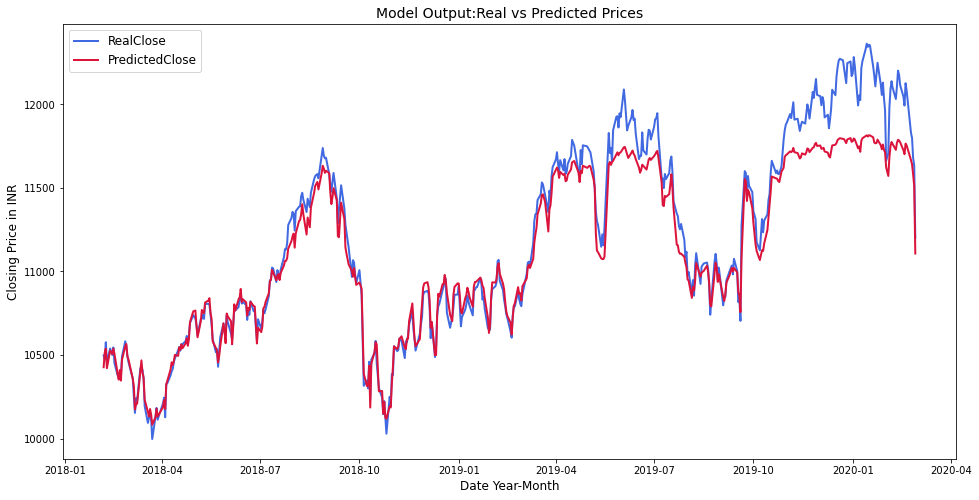

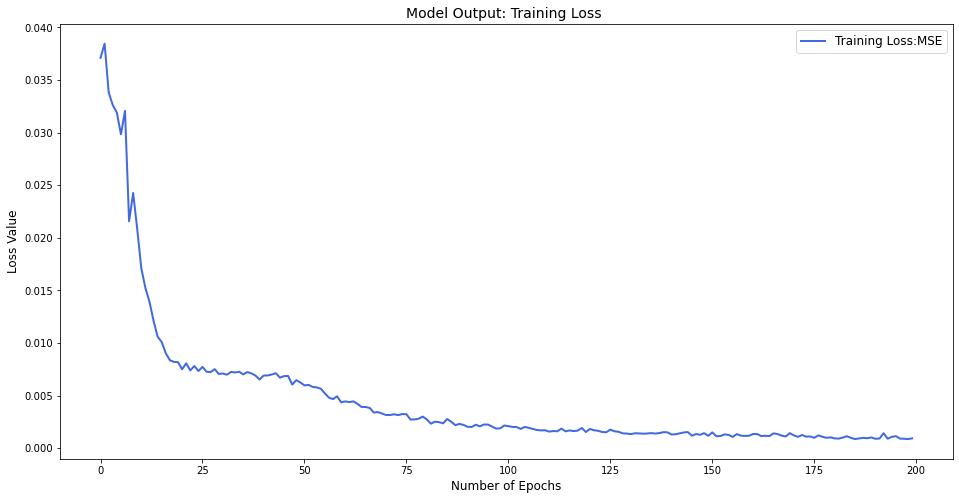

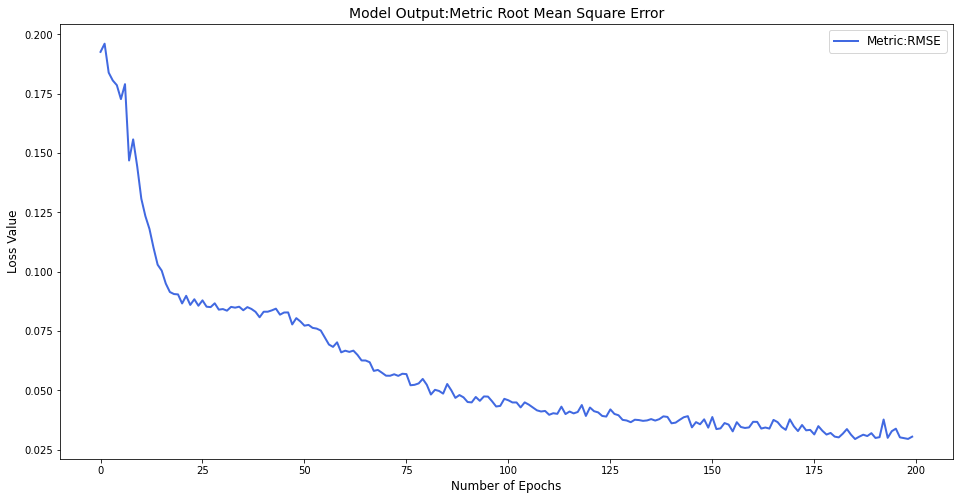

R2 Score for Model :  92.9919


In [49]:
#Running Prediction Algo using all features
PredictionAlgo(X_trainALL, X_testALL, 'All')

# Running Prediction Algo using features selected by SFS

16/16 [==============================] - 1s 5ms/step
LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.031871         0.018676            0.178525
1       0.041347         0.071210            0.203341
2       0.033419         0.078834            0.182807
3       0.032912         0.082342            0.181418
4       0.032600         0.082978            0.180556

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10514.96
2018-02-07  10476.70               10588.12
2018-02-08  10576.85               10566.88
2018-02-09  10454.95               10481.05
2018-02-12  10539.75               10549.92


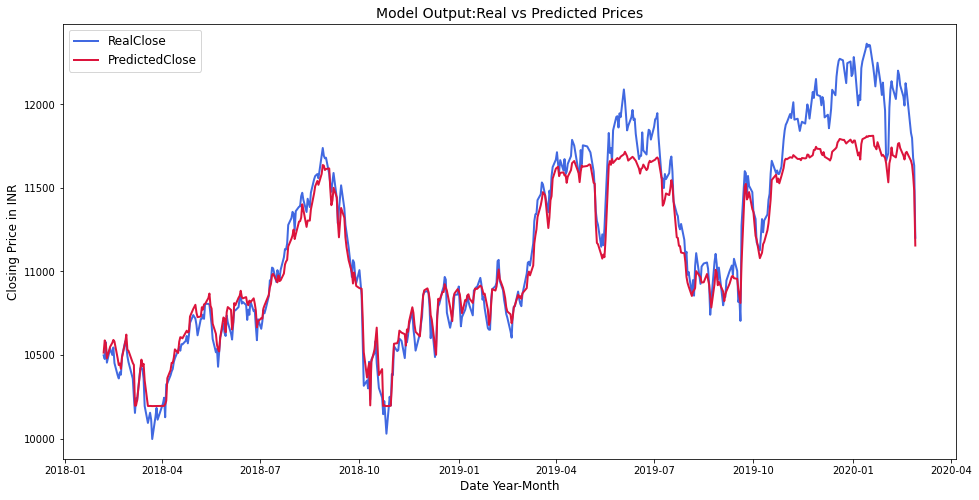

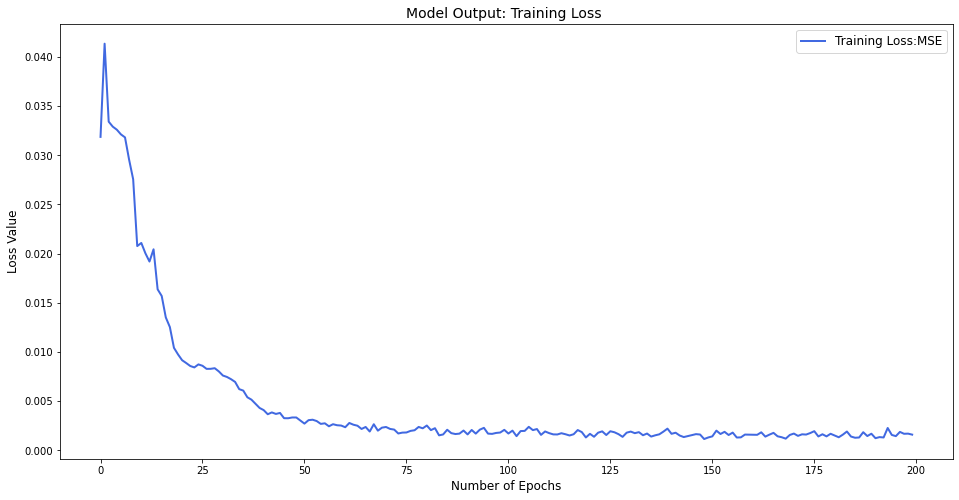

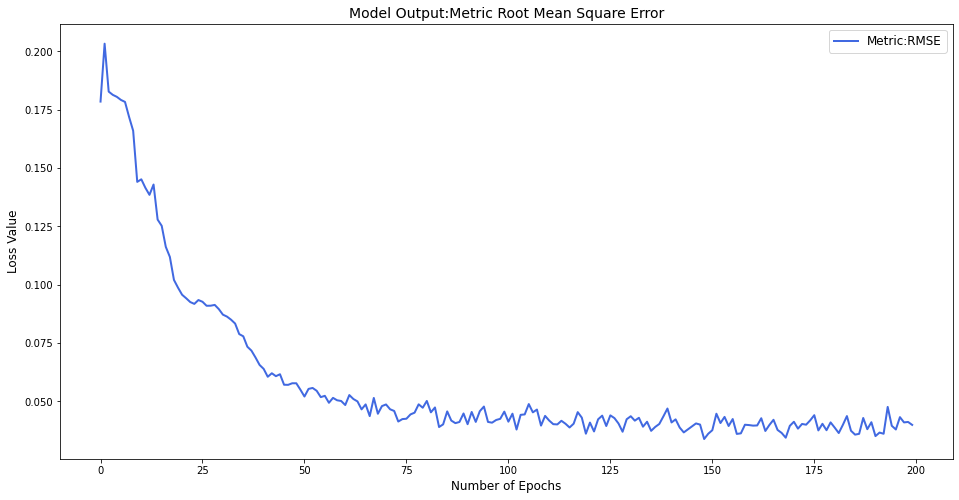

R2 Score for Model :  91.6402


In [50]:
 #Running Prediction Algo using features selected by SFS
PredictionAlgo(X_trainSFS, X_testSFS, 'SFS')


# Running Prediction Algo using features selected by Boruta

16/16 [==============================] - 1s 5ms/step
LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.036909         0.035816            0.192117
1       0.038121         0.075562            0.195247
2       0.033610         0.086188            0.183331
3       0.032686         0.089045            0.180793
4       0.032578         0.091865            0.180494

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10547.82
2018-02-07  10476.70               10625.09
2018-02-08  10576.85               10622.64
2018-02-09  10454.95               10526.11
2018-02-12  10539.75               10601.30


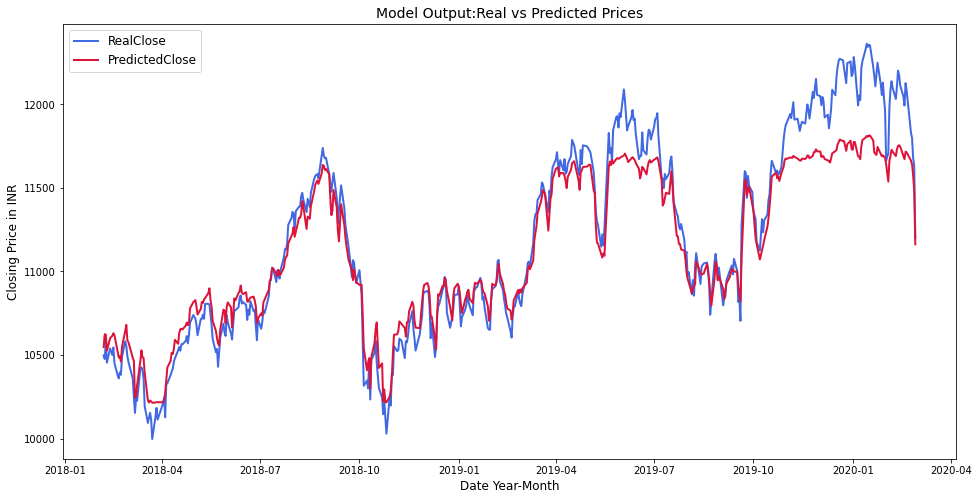

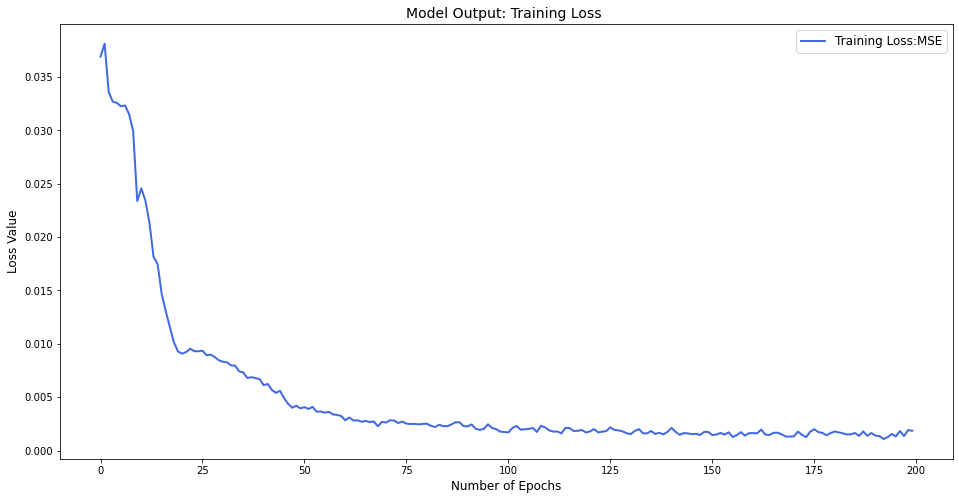

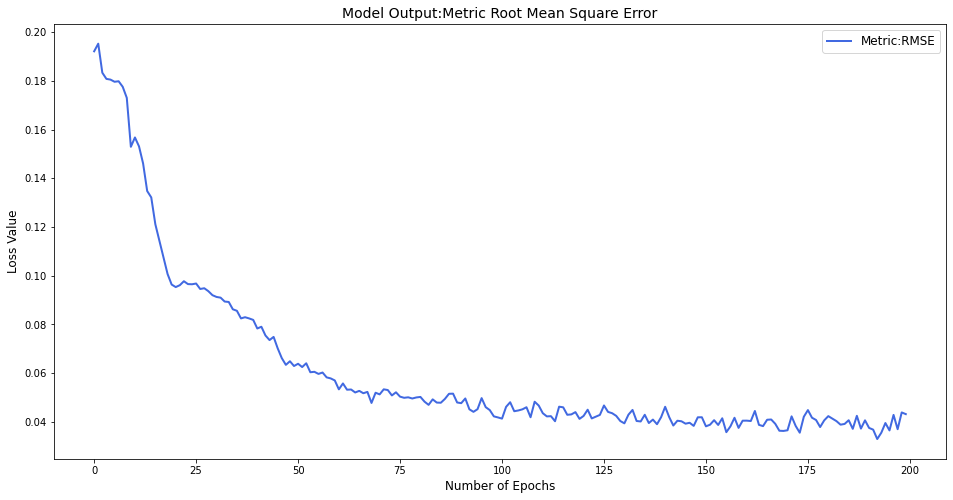

R2 Score for Model :  91.0606


In [51]:
 #Running Prediction Algo using features selected by Boruta
PredictionAlgo(X_trainBOR, X_testBOR, 'Boruta')


# Running Prediction Algo using features selected by Random Forest Importance

16/16 [==============================] - 2s 5ms/step
LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.029661         0.015646            0.172222
1       0.041674         0.067582            0.204143
2       0.033916         0.078972            0.184162
3       0.032844         0.082571            0.181230
4       0.032017         0.081595            0.178933

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10541.94
2018-02-07  10476.70               10622.21
2018-02-08  10576.85               10624.87
2018-02-09  10454.95               10527.49
2018-02-12  10539.75               10594.01


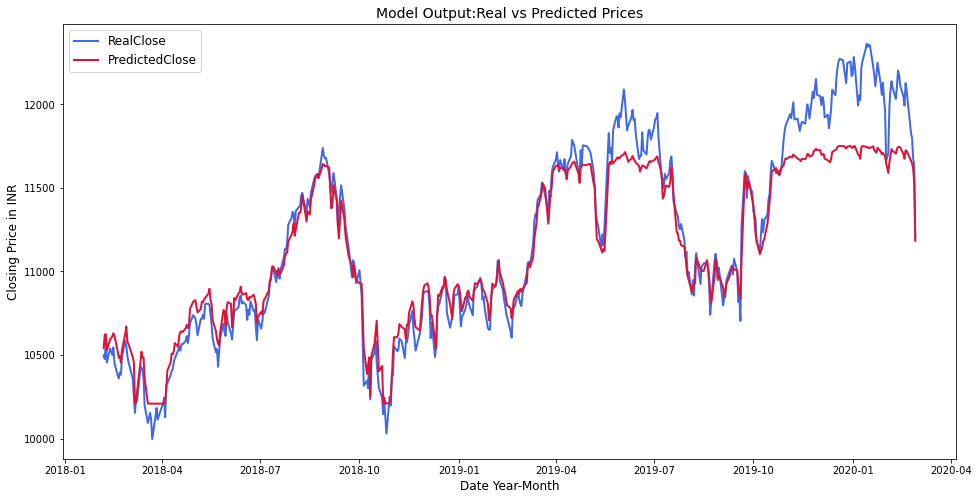

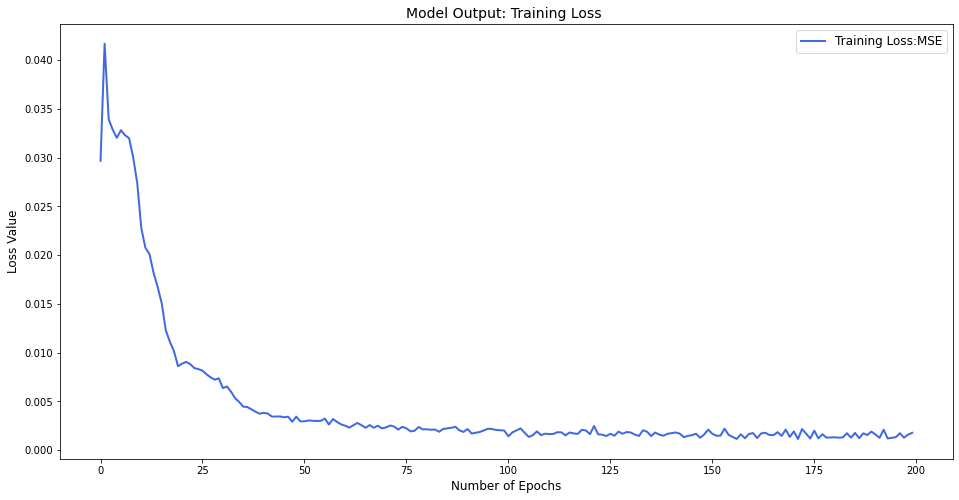

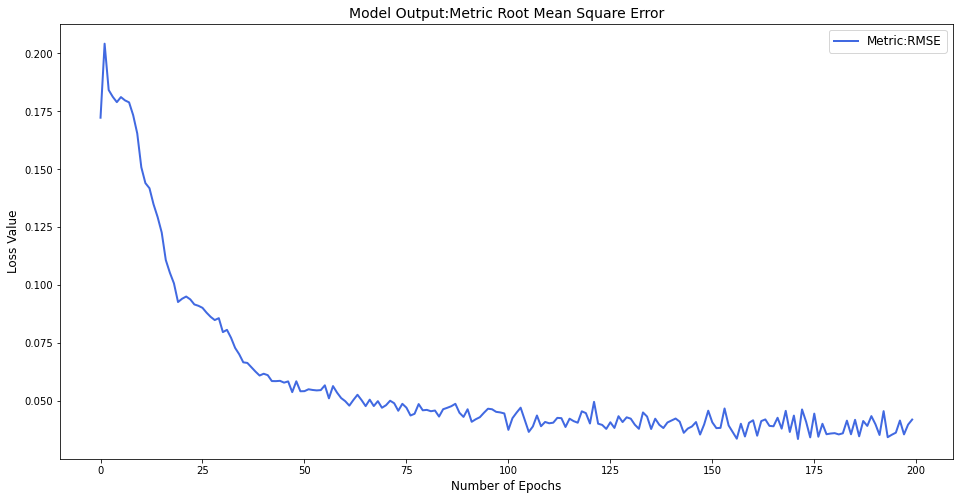

R2 Score for Model :  91.1446


In [52]:
#Running Prediction Algo using features selected by Random Forest Importance
PredictionAlgo(X_trainRFI, X_testRFI, 'RandomForestImportance')


# Running Prediction Algo using features selected by Fisher's Score

16/16 [==============================] - 1s 6ms/step
LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.040805         0.036812            0.202002
1       0.037841         0.077425            0.194526
2       0.033508         0.085467            0.183051
3       0.032868         0.088597            0.181295
4       0.032651         0.091266            0.180697

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10562.77
2018-02-07  10476.70               10551.76
2018-02-08  10576.85               10625.21
2018-02-09  10454.95               10497.86
2018-02-12  10539.75               10587.12


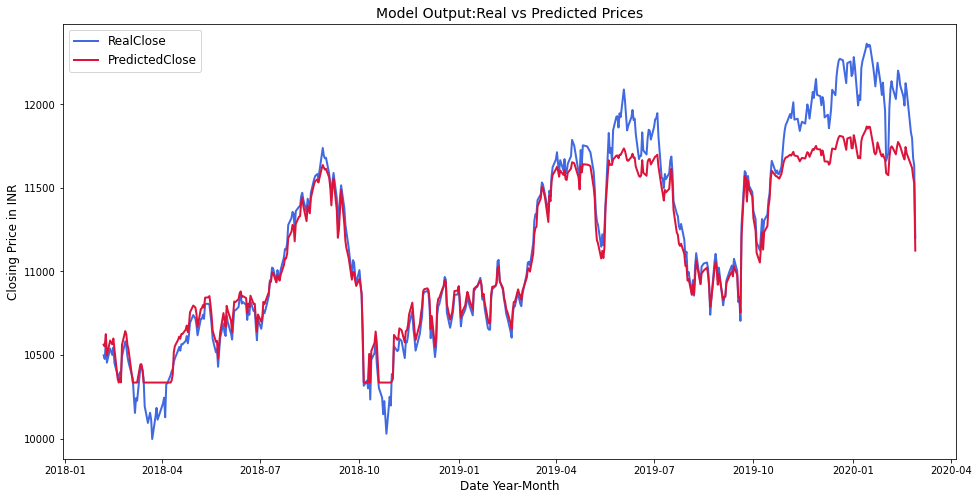

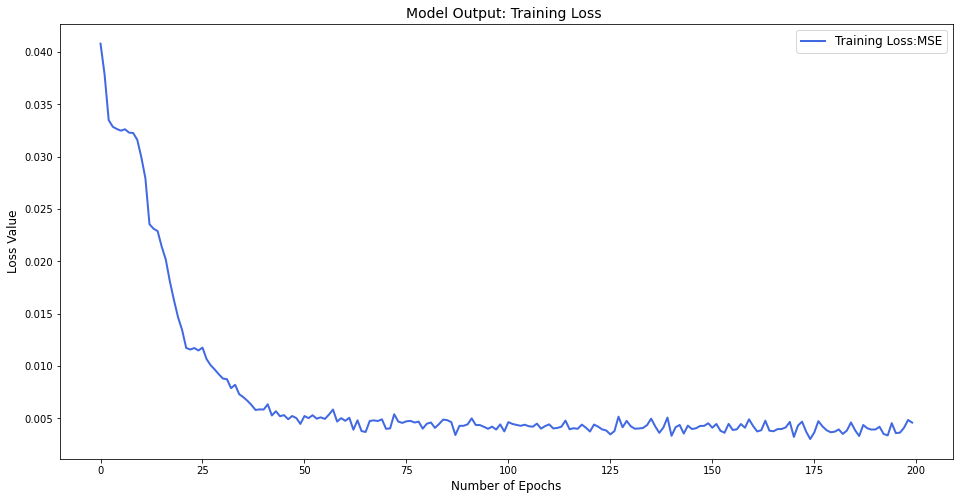

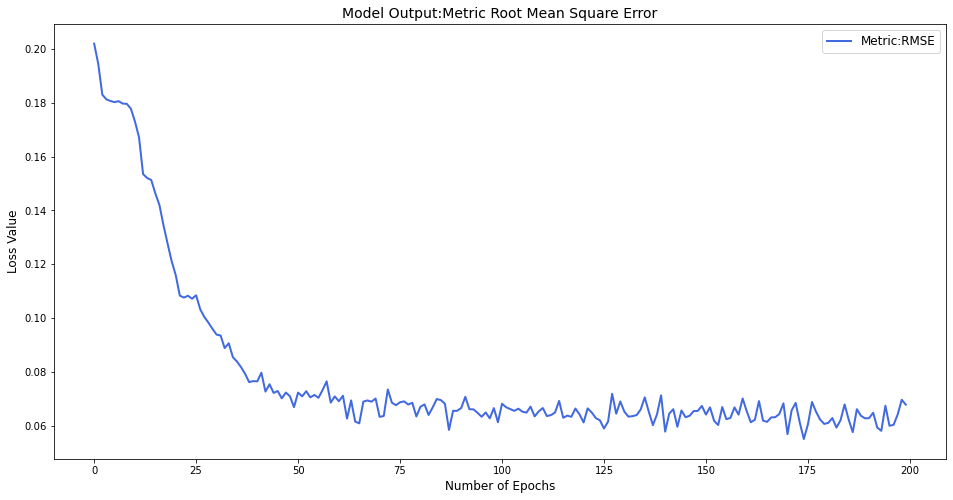

R2 Score for Model :  92.2729


In [53]:
 #Running Prediction Algo using features selected by Fisher's Score
PredictionAlgo(X_trainF, X_testF, 'Fisher')


# Running Prediction Algo using features selected by both SFS and Boruta

16/16 [==============================] - 1s 10ms/step
LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.025819         0.015259            0.160681
1       0.042342         0.069710            0.205772
2       0.033091         0.076095            0.181909
3       0.032730         0.078694            0.180915
4       0.032598         0.080486            0.180549

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10531.33
2018-02-07  10476.70               10629.53
2018-02-08  10576.85               10621.26
2018-02-09  10454.95               10528.06
2018-02-12  10539.75               10590.59


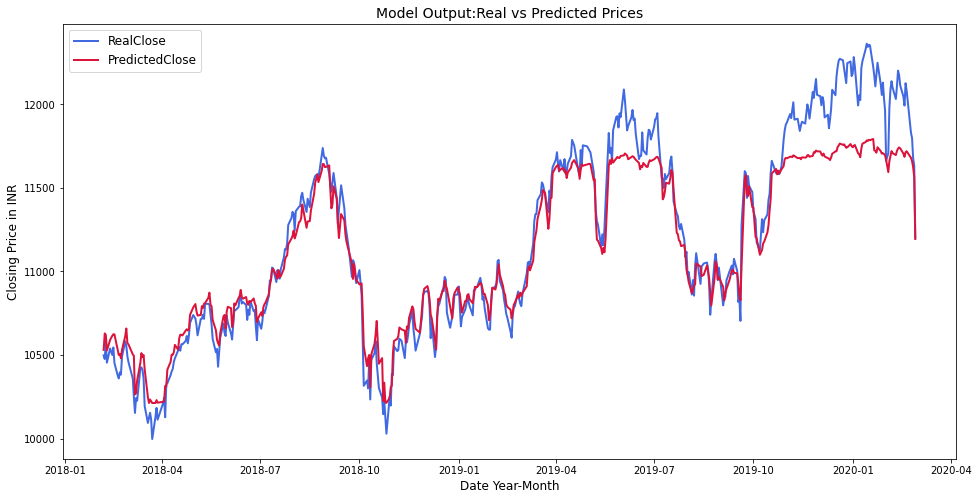

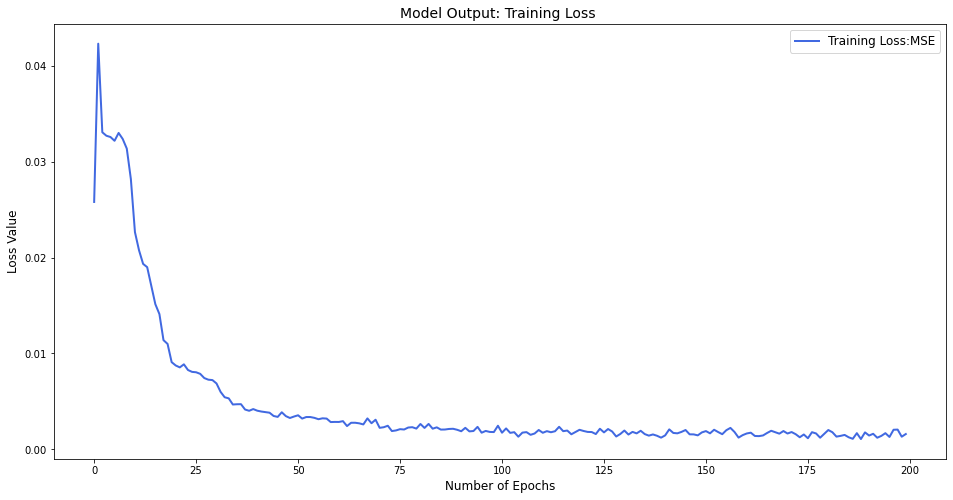

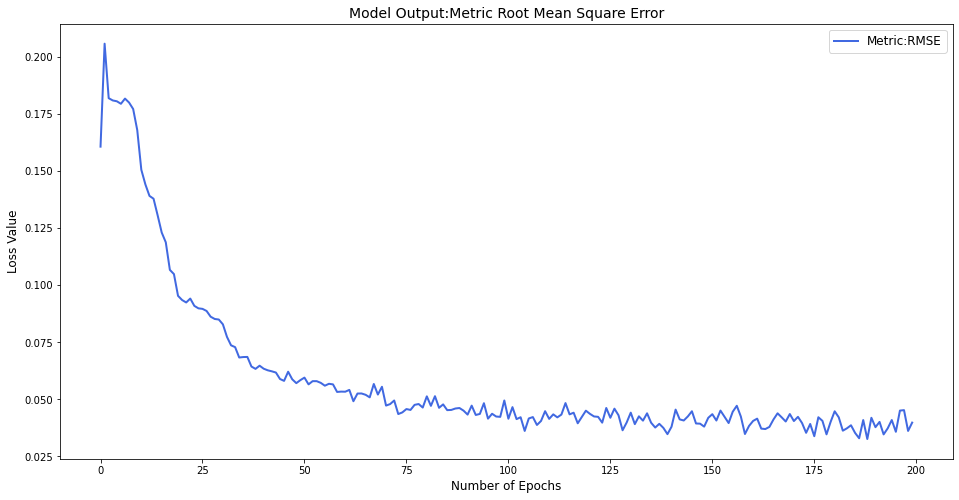

R2 Score for Model :  91.166


In [54]:
 #Running Prediction Algo using features selected by both SFS and Boruta
PredictionAlgo(X_trainCOM, X_testCOM, 'Common')


# Comparison of final r2 scores

In [55]:
 #Comparing final r2 scores
final = pd.DataFrame(Dscore, index=[0])
final


,All,SFS,Boruta,RandomForestImportance,Fisher,Common
0,92.9919,91.6402,91.0606,91.1446,92.2729,91.166


In [56]:
FC = {}
def addFeatures(x):
    for i in x:
        if i[0] not in FC:
            FC[i[0]]=1
        else:
            FC[i[0]]+=1
addFeatures(SFSSelected_features)
addFeatures(BorutaSelected_features)
addFeatures(RFImportanceSelected_features)
addFeatures(FisherSelected_features)


In [57]:
print("The features and their frequency is")
for i in FC:
    print(i,' - ', FC[i])


The features and their frequency is
Volume  -  3
pe_ratio  -  4
pb_ratio  -  3
sma20sig  -  2
ema10sig  -  1
ema50sig  -  3
Volatility  -  1
ema20sig  -  3
Momentum  -  2
dividend_yield  -  1
OI_change  -  1


In [58]:
print("The final selected features of highest importance are")
FinalFeatures = [(k, v) for k, v in FC.items()]
FinalFeatures.sort(key= lambda x: x[1], reverse=True)
for i in FinalFeatures:
    print(i[0])


The final selected features of highest importance are
pe_ratio
Volume
pb_ratio
ema50sig
ema20sig
sma20sig
Momentum
ema10sig
Volatility
dividend_yield
OI_change
